# World Health Organization: Global Suicide Trends and Analysis

## Table of Contents

    1 Introduction
        1.1 Dataset Information
        1.2 Import & Data Cleaning
        1.3 Key Insights
    2 Global Analysis
        2.1 Global Trend 
        2.2 By Continent 
        2.3 By Sex 
        2.4 By Age 
        2.5 By Country 
            2.5.1 Overall 
            2.5.2 Linear Trends
        2.6 Gender differences, by Continent 
        2.7 Gender differences, by Country 
        2.8 Age differences, by Continent 
        2.9 Do richer countries have a higher rate of suicide?

## 1) Introduction

### 1.1 Dataset Information

**Content**

This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

**References**

United Nations Development Program. (2018). Human development index (HDI). 
Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. 
Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. 
Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. 
Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

**Inspiration**

Suicide Prevention.

### 1.2 Import and Data Cleaning

In [2]:
# Import necessary libraries and dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc

# Import libraries for geographical map
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Import libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
os.chdir("D:\\google-drive\\3. Projects in Progress\\1. Data Analytics\\Suicide Rates Overview")
raw_data = pd.read_csv('master.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [3]:
raw_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


#### Data Cleaning Notes

1) HDI was removed due to only 8300 entries in total

2) Continent for each observation was added to the dataset

3) It seems that the dataset only has a few countries with 2016 data. As a result, the data for 2016 has been removed.

4) The minimum data needed for each country is > 3 years of data. 8 countries were removed as they had less than or equal to (<=) 3 years of data.


In [4]:
# Only 8364 entries for 'HDI for year' have actual values. The rest are NA
len(raw_data['HDI for year']) - len(raw_data[raw_data['HDI for year'].isna()])
raw_data.drop('HDI for year', axis = 1, inplace = True)

In [5]:
# Function to define the continent by country
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code =pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# Create a continent column
raw_data['continent'] = ' '

# Change the name of Republic of Korea to South Korea
for i in range(len(raw_data['country'])):
    if(raw_data['country'][i] == 'Republic of Korea'):
       raw_data['country'][i] = 'South Korea' 

# Convert the name of the country to continent
for i in range(len(raw_data['country'])):
    try:
        val = country_to_continent(raw_data['country'][i])
        raw_data['continent'][i] = val
    except:
        print(raw_data['country'][i])
        
# Manually input Saint Vincent and Grenadines as part of North America
for i in range(len(raw_data['country'])):
    if raw_data['country'][i] == 'Saint Vincent and Grenadines':
        raw_data['continent'][i] = 'North America'       

D:\Spyder\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

D:\Spyder\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent and Grenadines
Saint Vincent 

D:\Spyder\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
# There are 6 age groups with 2 genders each. This should give us 12 age groups in total for each country.
# There seem to be < 12 age groups for 2016 data. As a result, we will not include 2016 in our dataset
raw_data.rename(columns = {'country-year':'countryyear'}, inplace = True)
for i in range(len(raw_data['countryyear'].unique())):
    val = raw_data.loc[raw_data.countryyear == raw_data['countryyear'].unique()[i], 'countryyear'].count()
    if val < 12:
        print(raw_data['countryyear'].unique()[i], val)

# Remove all observations of countries in 2016
raw_data = raw_data[~raw_data['year'].isin([2016])]

Armenia2016 10
Austria2016 10
Croatia2016 10
Cyprus2016 10
Czech Republic2016 10
Grenada2016 10
Hungary2016 10
Iceland2016 10
Lithuania2016 10
Mauritius2016 10
Mongolia2016 10
Netherlands2016 10
Qatar2016 10
Romania2016 10
Sweden2016 10
Thailand2016 10


In [7]:
# Remove countries that have less than 3 years of data or 36 observations
# The following countries will be removed: 
# Bosnia and Herzegovina, Cabo Verde, Dominica, Macau, Mongolia, Oman, Saint Kitts and Nevis, San Marino
group_data = raw_data.groupby('country').count()
group_data[group_data['year'] <= 36]

# Remove the countries
raw_data = raw_data[~raw_data['country'].isin(['Bosnia and Herzegovina', 'Cabo Verde', 'Dominica', 'Macau','Mongolia',
                                               'Oman','Saint Kitts and Nevis','San Marino'])]

### 1.3 Key Insights

- Suicide rates have been decreasing globally (2.1)
- On average, suicide rate increases with age (2.4)
- There is a weak relationship between a country's GDP and its suicide rate (2.9)

## 2) Global Analysis

### 2.1 Global Trend

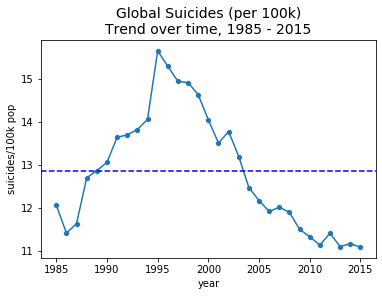

In [139]:
# Function that will groupby each column for visualization
def groupbyfunc(column):
    varname = raw_data.groupby(column).mean()
    list1 = sorted(raw_data[column].unique())
    varname[column] = list1
    return varname

# Create a dataset showing the trend by year
global_trend = groupbyfunc('year')

# Create a plot showing the average Global Suicides per 100K by year
sns.scatterplot(data = global_trend, x = 'year', y = 'suicides/100k pop')
sns.lineplot(data = global_trend, x = 'year', y = 'suicides/100k pop')
plt.title('Global Suicides (per 100k)\nTrend over time, 1985 - 2015', 
          fontsize = 14)
plt.axhline(y = raw_data['suicides/100k pop'].mean(), color = 'b', 
            linestyle = '--')
plt.show()

In [54]:
max_rate = global_trend['suicides/100k pop'].max()
print(global_trend[global_trend['year'] == 2015]['suicides/100k pop'],
      global_trend['suicides/100k pop'].max())

year
2015    11.094073
Name: suicides/100k pop, dtype: float64 15.662670940170946


*The dashed line is the global average suicide rate from 1985 - 2015. This is calculated as 12.8 deaths (per 100k, per year)*

**Insights**
- Peak suicide rate was 15.6 deaths per 100k in 1995
- This decreased steady to 11.09 deaths per 100k in 2015

### 2.2) By Continent

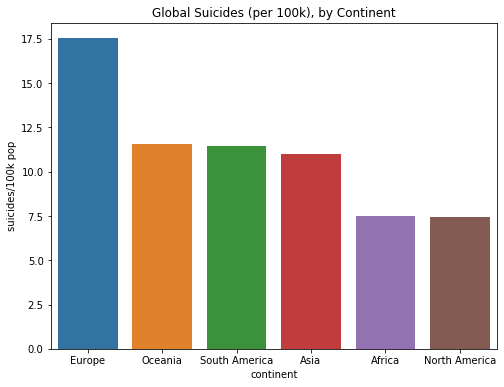

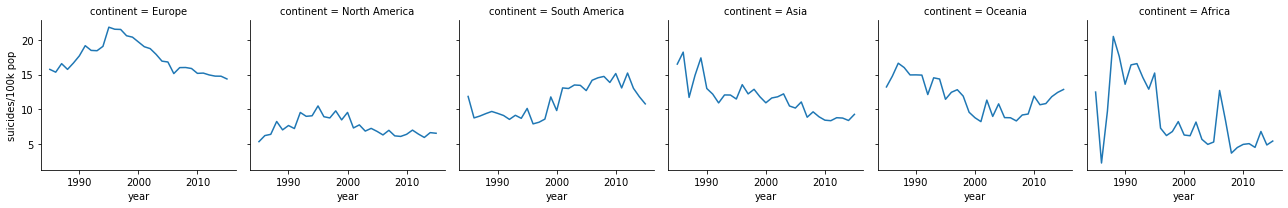

In [9]:
# Create a dataset showing the trend by continent
continent_trend = groupbyfunc('continent')
continent_trend = continent_trend.sort_values('suicides/100k pop', ascending = False)

# Plot global suicides (per 100k) by continent
plt.figure(figsize=(8,6))
sns.barplot(data = continent_trend, x = 'continent',
           y = 'suicides/100k pop')
plt.title('Global Suicides (per 100k), by Continent')

# Plot the trend of global suicides by continent over 1985-2015
g = sns.FacetGrid(raw_data, col = 'continent')
g = g.map(sns.lineplot, 'year','suicides/100k pop', ci = None)

*Insights*

- The European suicide rate is the highest overall but has steadily decreased since 1995
- The large fluctuations in Africa is due to the poor quality of data provided by the countries
- The trend in Oceania is more concerning

### 2.3) By Sex

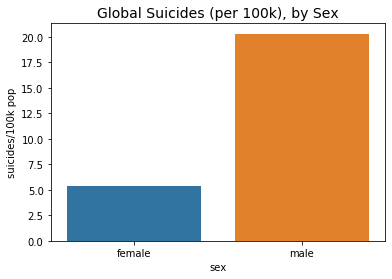

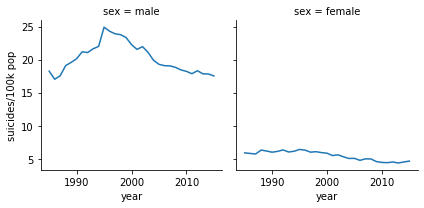

In [10]:
# Create a dataset showing the trend by sex
gender_trend = groupbyfunc('sex')

# Show the visual for the boxplot
sns.barplot(data = gender_trend, x = 'sex', y = 'suicides/100k pop')
plt.title('Global Suicides (per 100k), by Sex', size = 14)

# Plot the trend of global suicides by sex over 1985-2015
g = sns.FacetGrid(raw_data, col = 'sex')
g = g.map(sns.lineplot, 'year','suicides/100k pop', ci = None)


*Insights*

- The rate of suicide for men is much higher than women
- Both male and female suicide rates peaked in 1995 and have been declining

### 2.4) By Age

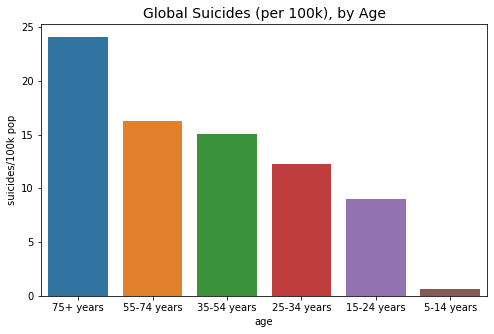

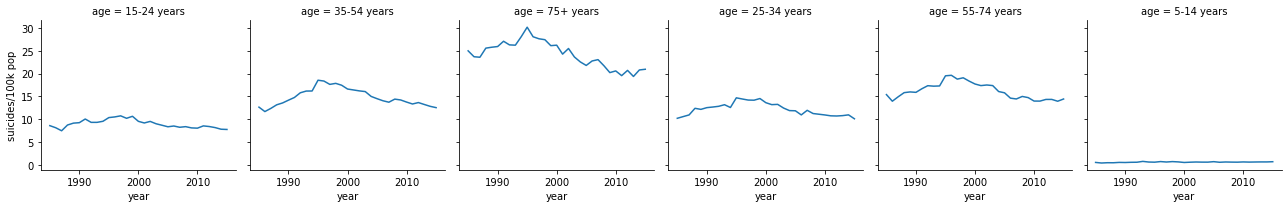

In [11]:
# Create a dataset showing the trend by age
age_trend = groupbyfunc('age')
age_trend = age_trend.sort_values('suicides/100k pop', ascending = False)

# Show the visual for the boxplot
plt.figure(figsize=(8,5))
sns.barplot(data = age_trend, x = 'age', y = 'suicides/100k pop')
plt.title('Global Suicides (per 100k), by Age', size = 14)

# Plot the trend of global suicides by age over 1985-2015
g = sns.FacetGrid(raw_data, col = 'age')
g = g.map(sns.lineplot, 'year','suicides/100k pop', ci = None)

*Insights*

- Globally, the likelihood of suicide increases with age
- The suicide rate in the '5-14' age category remains small


### 2.5) By Country

D:\Spyder\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



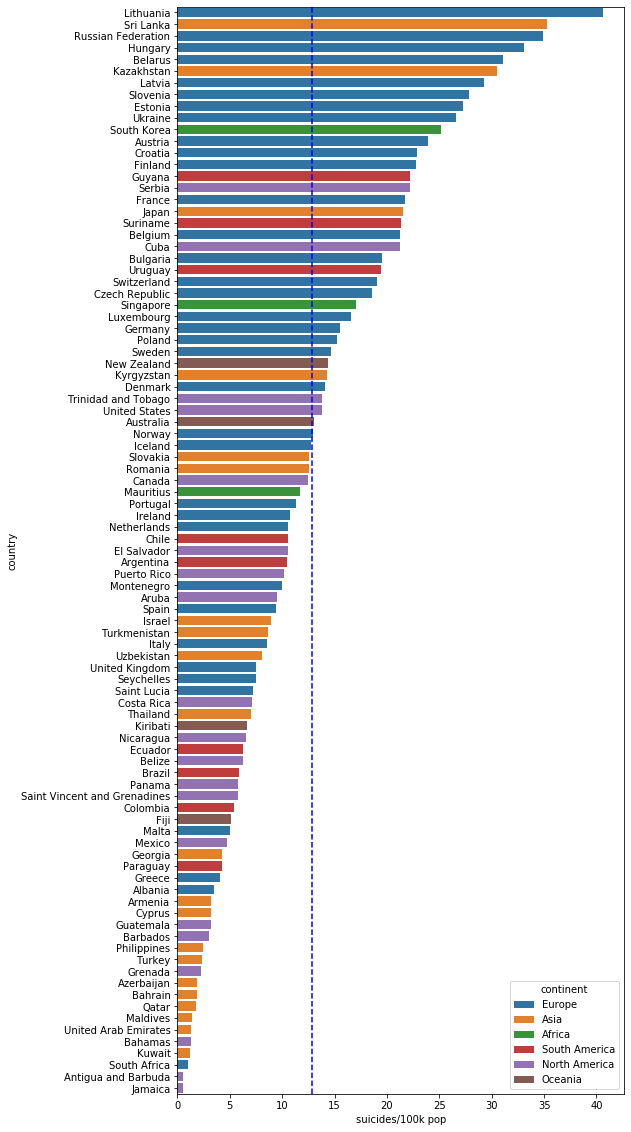

In [12]:
# Create a dataset showing the trend by country
country_trend = groupbyfunc('country')

# Add the continent column
df1 = raw_data[['country','continent']]
df1 = df1.drop_duplicates()
df1.reset_index(drop=True, inplace=True)
country_trend['continent'] = ''
for i in range(len(country_trend['country'])):
    country_trend['continent'][i] = df1['continent'][i]

# Plot barplot using country and continent
country_trend = country_trend.sort_values('suicides/100k pop', ascending = False).reset_index(drop = True)
plt.figure(figsize=(8,20))
ax = sns.barplot(data = country_trend, x = 'suicides/100k pop', y = 'country', hue = 'continent', dodge = False)
plt.axvline(x = raw_data['suicides/100k pop'].mean(), color = 'b', linestyle = '--')

*Insights*

- Lithuania's rate has been the highest by a large margin
- There is a high number of European countries with high rates.
- We also see many Asian countries with low suicide rates

Below is a geographical heat map of the suicide rates between 1985 to 2015. Please note that there is a lack of data for Africa and Asia. Also, as discussed previously, we have removed 7 countries due to insufficient data.

In [13]:
data = dict(
            type = 'choropleth',
            locations = country_trend['country'],
            locationmode = 'country names',
            z = country_trend['suicides/100k pop'],
            text = country_trend['country'],
            colorbar = {'title':'Suicides / 100k Population'})
layout = dict(
              title = 'Suicides / 100k Population',
              geo = dict(
                         showframe = False))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

I'm also looking at how the suicide rate is changing over time for the countries in the dataset. To do this, I fit a linear regression to every country's data. 

This will show how each country's suicide rate is linearly increasing or decreasing over time. The rank can be ordered by their year coefficient. The year coefficient would be the rate of change as time goes on.



Text(0.5, 0, 'Change per year (Suicides per 100K)')

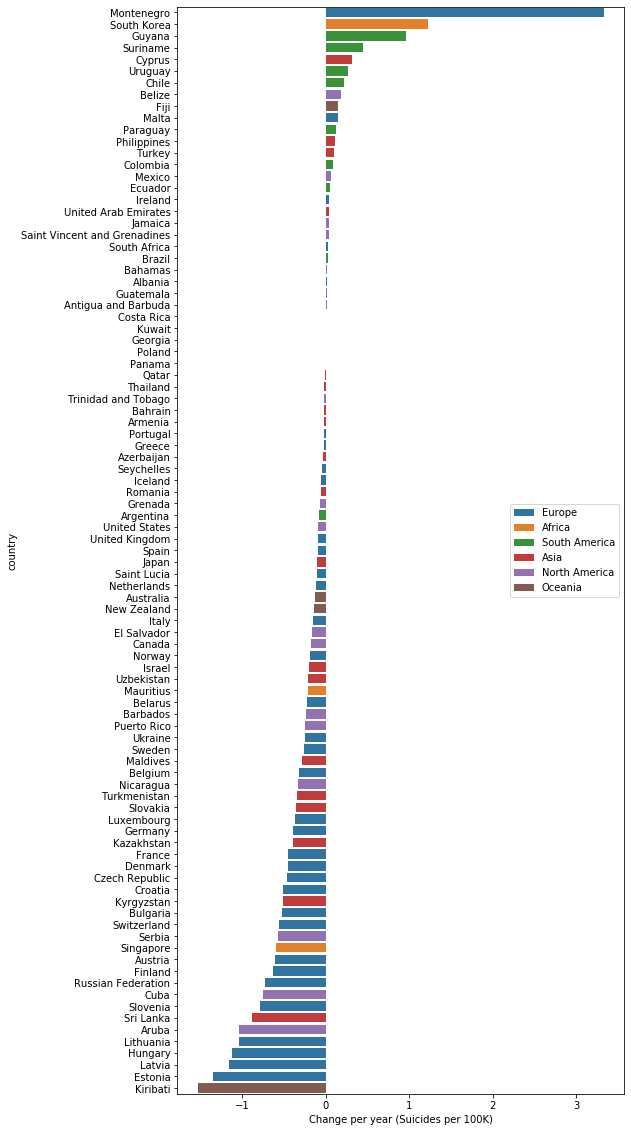

In [15]:
# Create a regression coefficient for each country
raw_data['regression_coeff'] = ''
for i in range(len(country_trend['country'])):
    df = raw_data[raw_data['country'] == country_trend['country'][i]][['year','suicides/100k pop']]
    x = df[['year']]
    y = df['suicides/100k pop']
    lm = LinearRegression()
    lm.fit(x,y)
    reg = lm.coef_
    country_trend.loc[i,'regression_coeff']= reg[0]

# Sort country_trend dataset according to regression coefficient
country_trend = country_trend.sort_values('regression_coeff', ascending = False).reset_index(drop = True)    

# Plot the regression Trend for each country
plt.figure(figsize=(8,20))
sns.barplot(data = country_trend, x = 'regression_coeff', y = 'country', hue = 'continent', dodge = False)
plt.legend(loc = 'center right')
plt.xlabel('Change per year (Suicides per 100K)')

*Insights*

- We see that many European countries have decreasing coefficients or their suicide rates have been decreasing with time
- It is alarming to see that South Korea and other Asian countires have high regression coefficients

### 2.7) Gender differences, by Continent

Text(0.5, 1.0, 'Gender Disparity, by continent')

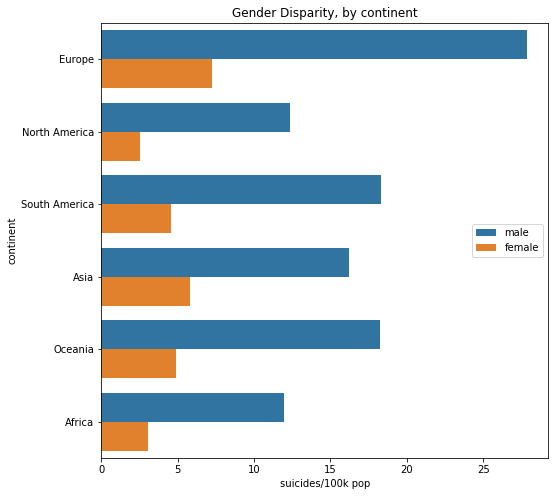

In [14]:
# Show gender disparity by continent
plt.figure(figsize=(8,8))
sns.barplot(data = raw_data, x = 'suicides/100k pop', y = 'continent', hue = 'sex', ci = None)
plt.legend(loc = 'center right')
plt.title('Gender Disparity, by continent')

*Insights*

- European men seem to be at the highest risk between 1985 - 2015
- Africa's suicide rate was lowest due to unavailability of data for the majority of African states

Text(0.5, 0, 'Change per year (Suicides per 100K)')

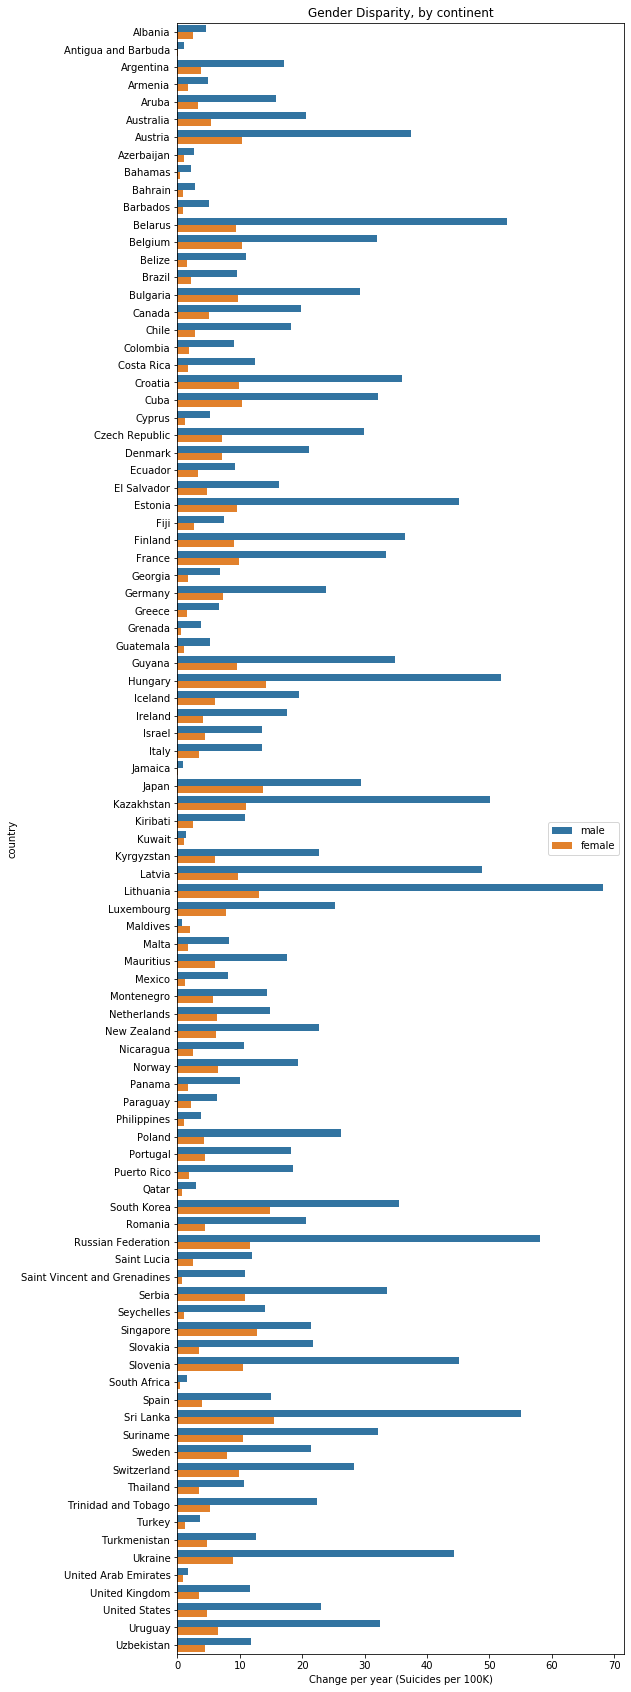

In [15]:
plt.figure(figsize=(8,30))
sns.barplot(data = raw_data, x = 'suicides/100k pop', y = 'country', hue = 'sex', ci = None)
plt.legend(loc = 'center right')
plt.title('Gender Disparity, by continent')
plt.xlabel('Change per year (Suicides per 100K)')

In [ ]:
# create a dataset for all male by country
# create a dataset for all female by country
# groupby country
# 

In [121]:
# Sum up the total suicides / 100k pop for both male and female
df1 = raw_data.groupby('country').sum()
df1 = df1.sort_values('country')
list1 = list(df1['suicides/100k pop'])

# Find countries from raw_data
list2 = raw_data['country'].unique()

# Create male dataset and find sum of total suicides / 100k pop
df_male = raw_data[raw_data['sex'] == 'male']
df_male = df_male.groupby('country').sum()
df_male = df_male.sort_values('country')
df_male['total suicides'] = list1
df_male['percentage'] = df_male['suicides/100k pop'] / df_male['total suicides']
df_male['sex'] = 'male'
df_male['country1'] = list2

# Create female dataset and find sum of total suicides / 100k pop
df_female = raw_data[raw_data['sex'] == 'female']
df_female = df_female.groupby('country').sum()
df_female = df_female.sort_values('country')
df_female['total suicides'] = list1
df_female['percentage'] = df_female['suicides/100k pop'] / df_female['total suicides']
df_female['sex'] = 'female'
df_female['country1'] = list2

# Put the dataset together
df_sex = df_male.append(df_female)
df_sex = df_sex.sort_values('country')
df_sex['percentage'] = df_sex['percentage'] * 100

# Plot plotly chart showing the suicides by country based on gender
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

trace1 = go.Bar(x = list(df_sex[df_sex['sex'] == 'male']['country1']),y = list(df_sex[df_sex['sex'] == 'male']['percentage']), 
                name = 'Male',marker = {'color':'#CD7F32'})
trace2 = go.Bar(x = list(df_sex[df_sex['sex'] == 'female']['country1']), y = list(df_sex[df_sex['sex'] == 'female']['percentage']), 
                name = 'Female',marker = {'color':'#9EA0A1'})
data = [trace1,trace2]

layout = go.Layout(title = 'Proportions of suicides that are Male & Female, by Country', barmode = 'stack')
fig = go.Figure(data = data, layout = layout)
iplot(fig)


*Insights*

- There is a universal overrepresentation of men throughout the countries in the dataset
- This can be attributed to the gender paradox on suicidal behavior

### 2.8) Age differences, by Continent

Text(0.5, 0, 'continent')

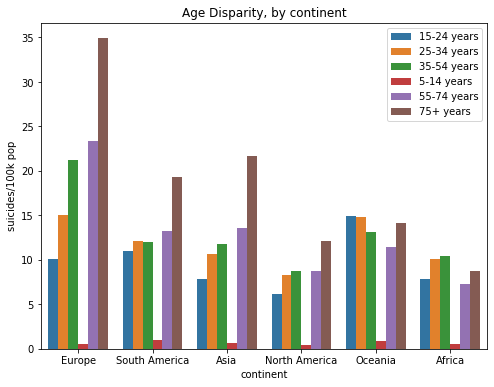

In [135]:
plt.figure(figsize=(8,6))
sns.barplot(data = raw_data.sort_values('age'), x = 'continent', y = 'suicides/100k pop', hue = 'age', ci = None)
plt.legend(loc = 'upper right')
plt.title('Age Disparity, by continent')
plt.xlabel('continent')

*Insights*

- For the Americas, Asia and Europe, suicide rate increases with age
- The highest suicide rate for each Europe, South America, Asia and North America occurs in the 75+ age group
- The highest suicide rate for Oceania and Africa occurs in the 15-24 and 35-54 age groups respectively


### 2.9) Do richer countries have a higher rate of suicide?

I have taken the mean GDP per capita of every country across all years of available data (1985 to 2015). This is then compared to the mean suicides / 100k pop for the period (1985 to 2015). 

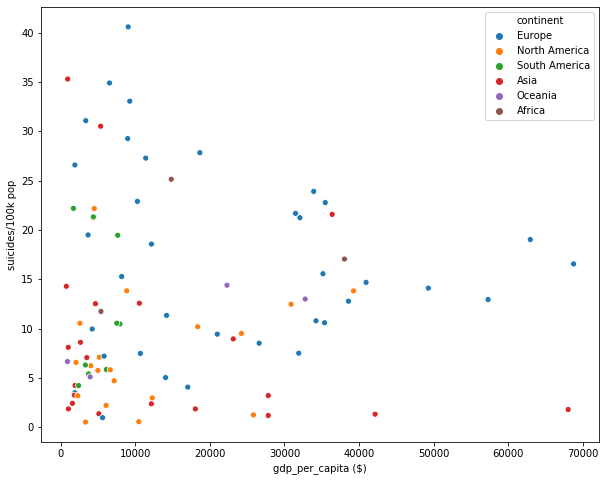

In [148]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = country_trend, x = 'gdp_per_capita ($)', y = 'suicides/100k pop', hue = 'continent' )

<Figure size 720x576 with 0 Axes>

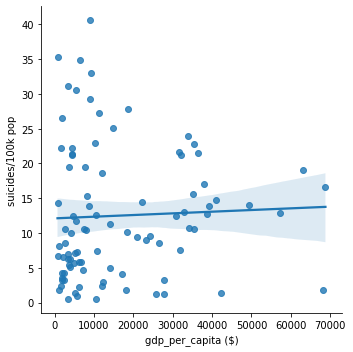

In [157]:
plt.figure(figsize=(10,8))
sns.lmplot(data = country_trend, x = 'gdp_per_capita ($)', y = 'suicides/100k pop')

In [ ]:
x = country_trend[['gdp_per_capita ($)']]
y = country_trend['suicides/100k pop']
lm = LinearRegression()
lm.fit(x,y)
reg = lm.coef_
print(lm.coef_)
print(lm.intercept_)

The line of best fit is represented by the equation below:

   Suicides = 2.4*$10^{-5}$ * GDP + 12.10922
   
The trend line and the results of the linear plot above show that there is no significant relationship between gdp per capita and the suicides / 100k population